In [23]:
# Written by XiaoHu z5223731
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift
from sklearn import cluster
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [24]:
# https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html
def apply_watershed(gray):
    
    image = np.array(gray)
    distance = ndi.distance_transform_edt(image)
    coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(-distance, markers, mask=image)
    
    return distance, labels

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift.fit_predict
def apply_meanshift(image):
#     if this function takes too much time to compute then resize the image
#     img = cv2.resize(image, (100,100))
    img = np.array(image)
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    original_shape = red.shape
    print(original_shape)
    red_flatten = red.flatten()
    green_flatten = green.flatten()
    blue_flatten = blue.flatten()
    colour_samples = np.column_stack([red_flatten, green_flatten, blue_flatten])
    print(colour_samples.shape)
    band_width = cluster.estimate_bandwidth(colour_samples, quantile=0.2,n_samples=500)
    ms_clf = MeanShift(bandwidth=band_width,bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples).reshape(original_shape)
    return ms_labels

Q1 and Q2

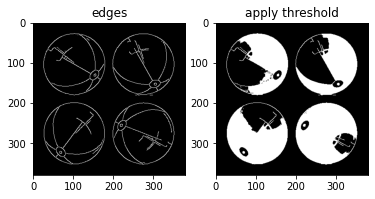

In [25]:
image = cv2.imread('ball_set.jpg')
# convert to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# get the edges of image
edges = cv2.Canny(image,100,200)
# https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
# apply otsu threshold to image
ret,thresh2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    
plt.subplot(1,2,1)
plt.title('edges')
plt.imshow(edges, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(1,2,2)
plt.title('apply threshold')
plt.imshow(thresh2+edges, cmap = 'gray', vmin = 0, vmax = 255)

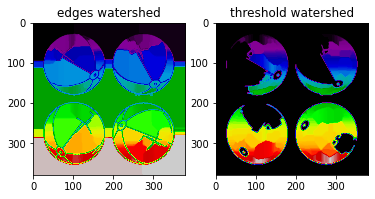

In [26]:
# apply watershed of pre-processing image(otsu shold + edges)
distance1, img1 = apply_watershed(thresh2+edges)
ret,thresh = cv2.threshold(edges,127,255,cv2.THRESH_BINARY_INV)
# apply watershed of pre-processing image(edges)
distance2, img2 = apply_watershed(thresh)

plt.subplot(1,2,1)
plt.title('edges watershed')
plt.imshow(img2, cmap=plt.cm.nipy_spectral)

plt.subplot(1,2,2)
plt.title('threshold watershed')
plt.imshow(img1, cmap=plt.cm.nipy_spectral)

(380, 380)
(144400, 3)


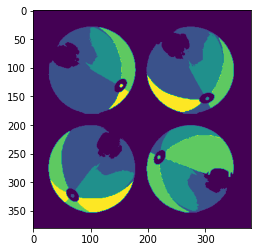

In [27]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# print(image.shape)
img = apply_meanshift(image)

plt.imshow(img)

Q3

(400, 800)
(320000, 3)


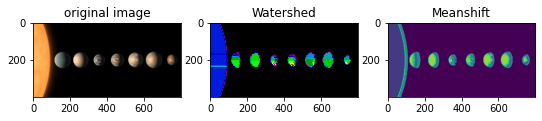

In [28]:
image = cv2.imread('planets.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret,thresh2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# edges = cv2.Canny(image,100,200)
distance1, img_watershed = apply_watershed(thresh2)

img_meanshift = apply_meanshift(image)

# plt.subplot(1,3,1)
# plt.title('original image')
# plt.imshow(image)

# plt.subplot(1,3,2)
# plt.title('Watershed')
# plt.imshow(img_watershed, cmap=plt.cm.nipy_spectral)

# plt.subplot(1,3,3)
# plt.title('Meanshift')
# plt.imshow(img, cmap=plt.cm.nipy_spectral)

# plt.tight_layout()
# plt.show()
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=False, sharey=False)
ax = axes.ravel()


ax[0].imshow(image,cmap=plt.cm.nipy_spectral)
ax[0].set_title('original image')
ax[1].imshow(img_watershed, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Watershed')
ax[2].imshow(img_meanshift)
ax[2].set_title('Meanshift')

plt.savefig('Q3_output.jpg')